# Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from pandas.plotting import scatter_matrix
from scipy import stats

In [ ]:
df = pd.read_csv('../data/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


| Column Name     | Type     | Description                                        |
|-----------------|----------|----------------------------------------------------|
| year            | int64    | The manufacturing year of the vehicle (e.g., 2015) |
| make            | object   | The brand or manufacturer of the vehicle (e.g., Kia, BMW, Volvo) |
| model           | object   | The specific model of the vehicle (e.g., Sorento, 3 Series, S60, 6 Series Gran Coupe) |
| trim            | object   | Additional designation for a particular version or option package of the model (e.g., LX, 328i SULEV, T5, 650i) |
| body            | object   | The type of vehicle body (e.g., SUV, Sedan)        |
| transmission    | object   | The type of transmission in the vehicle (e.g., automatic) |
| vin             | object   | The Vehicle Identification Number, a unique code used to identify individual motor vehicles |
| state           | object   | The state in which the vehicle is located or registered (e.g., CA for California) |
| condition       | float64  | A numerical representation of the condition of the vehicle (e.g., 5.0) |
| odometer        | float64  | The mileage or distance traveled by the vehicle    |
| color           | object   | The exterior color of the vehicle                  |
| interior        | object   | The interior color of the vehicle                  |
| seller          | object   | The entity or company selling the vehicle (e.g., Kia Motors America Inc, Financial Services Remarketing) |
| mmr             | float64  | Manheim Market Report, a pricing tool used in the automotive industry |
| sellingprice    | float64  | The price at which the vehicle was sold            |
| saledate        | object   | The date and time when the vehicle was sold        |


### Missing values
After EDA stage we know that several columns has null values inside them, we handle null values as in EDA stage

#### Handling Missing Values In Categorical Columns

In [ ]:
# Fill missing values with 'other' category
df['trim'] = df['trim'].fillna('other')
df['color'] = df['color'].fillna('other')
df['make'] = df['make'].fillna('other')
df['model'] = df['model'].fillna('other')


# Fill missing values with mode
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

# Remove null values
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)


#### Handling Missing Values in Numerical Columns

In [ ]:
df['condition'] = df['condition'].fillna(df['condition'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['mmr'] = df['mmr'].fillna(df['mmr'].mean())

/tmp/ipykernel_19/1289971030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna(df['condition'].median(), inplace=True)
/tmp/ipykernel_19/1289971030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

<br>

#### Outliers Handling

In EDA stage we found that numerical coulmns have outliers, to deal with them we use z-score statistics as in EDA.

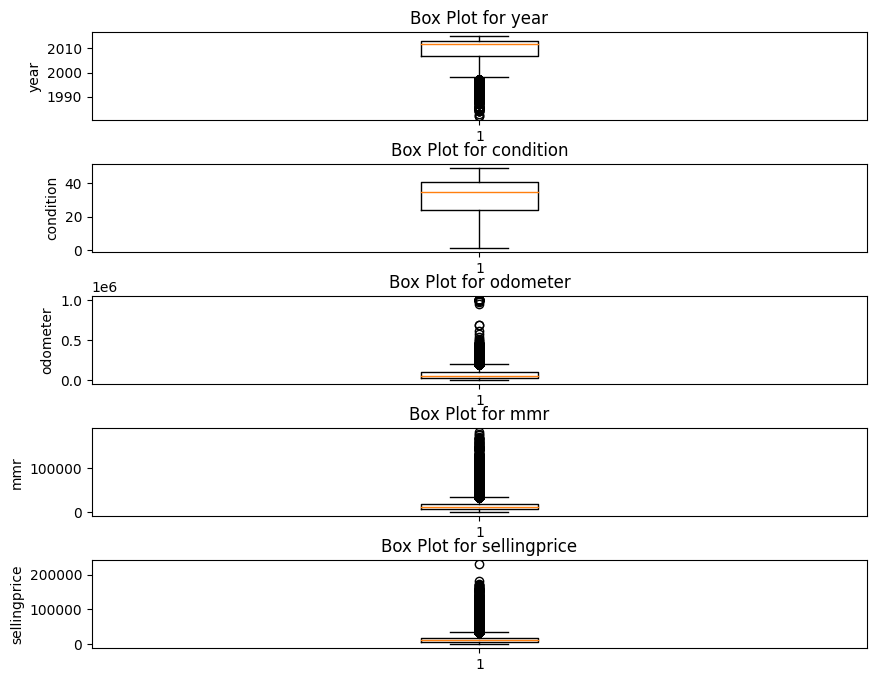

In [ ]:
# selecting numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# Remove outliers using Z-score
z_scores = stats.zscore(df[numerical_columns])
clean_df = df[(z_scores < 2).all(axis=1)]
clean_df.shape

(511816, 16)

In [ ]:
clean_df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [ ]:
clean_df.describe()

,year,condition,odometer,mmr,sellingprice
count,511816.000000,511816.000000,511816.000000,511816.000000,511816.000000
mean,2010.237798,31.030118,63351.716578,13029.954811,12861.592033
std,3.704200,13.043716,43007.915008,7230.515564,7331.708638
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,25.000000,28792.000000,7675.000000,7400.000000
50%,2012.000000,35.000000,51633.000000,12300.000000,12100.000000
75%,2013.000000,41.000000,94396.500000,17650.000000,17600.000000
max,2015.000000,49.000000,175107.000000,33100.000000,33100.000000


In [ ]:
#we are dropping the saledate column because we face error inside this column. And its not going to help us in analysis. in Timeseries analysis it can help but we are not doing time series analysis on this data.
clean_df.drop(columns=['saledate'], inplace=True)

/tmp/ipykernel_19/417278354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(columns=['saledate'], inplace=True)


In [ ]:
clean_df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0


In [ ]:
clean_df.shape

(511816, 15)

# Feature Engineering

In [ ]:
# Normalize/Scalling function. it will return scale dataframe.
def normalize(df):
    # Nominal categories
    for name in features_nom:
        df[name] = df[name].astype("category")
        # Add a None category for missing values
        if "None" not in df[name].cat.categories:
            df[name] = df[name].cat.add_categories("None")
    # Ordinal categories
    for name, levels in ordered_levels.items():
        df[name] = df[name].astype(CategoricalDtype(levels,
                                                    ordered=True))
    return df

The numeric features are already encoded correctly (`float` for continuous, `int` for discrete), but the categoricals we'll need to do ourselves

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def normalize_features(df):
    # Copy the original DataFrame to avoid modifying the input
    normalized_df = df.copy()

    # Numerical columns to be normalized
    numerical_cols = ['year', 'condition', 'odometer', 'mmr']

    # Categorical columns to be encoded
    categorical_cols = [col for col in df.columns if col not in numerical_cols]

    # Normalize numerical features using Min-Max Scaling
    scaler_dict = {}
    for col in numerical_cols:
        scaler = MinMaxScaler()
        normalized_df[col] = scaler.fit_transform(df[[col]])
        scaler_dict[col] = scaler

    # Encode categorical features using Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        normalized_df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # # Encode the target column
    # target_col = 'sellingprice'
    # if target_col in df.columns:
    #     normalized_df[target_col] = label_encoders[target_col].transform(df[target_col])
    #     label_encoders[target_col] = le  # Add the target encoder to the dictionary

    return normalized_df, scaler_dict, label_encoders


Normalize numerical features using Min-Max Scaling and encode categorical features.

    Parameters:
    - df: DataFrame, the input DataFrame containing both numerical and categorical features.

    Returns:
    - normalized_df: DataFrame, the normalized DataFrame.
    - scaler_dict: dict, dictionary containing MinMaxScaler objects for numerical columns.
    - label_encoders: dict, dictionary containing LabelEncoder objects for categorical columns.

In [ ]:
normalized_df, scaler_dict, label_encoders = normalize_features(clean_df)

In [ ]:
normalized_df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,1.000000,20,600,906,33,1,373764,25,0.083333,0.095017,40,1,6787,0.619048,797
1,1.000000,20,600,906,33,1,373756,25,0.083333,0.053636,40,0,6787,0.628118,797
2,0.969697,2,8,273,34,1,467824,25,0.916667,0.007595,30,1,4691,0.963719,1057
3,1.000000,44,544,1277,34,1,500605,25,0.833333,0.081556,40,1,12992,0.830688,995
5,1.000000,30,68,116,34,1,175740,25,0.000000,0.031712,30,1,4345,0.463341,408


In [ ]:
scaler_dict

{'year': MinMaxScaler(),
 'condition': MinMaxScaler(),
 'odometer': MinMaxScaler(),
 'mmr': MinMaxScaler()}

In [ ]:
label_encoders

{'make': LabelEncoder(),
 'model': LabelEncoder(),
 'trim': LabelEncoder(),
 'body': LabelEncoder(),
 'transmission': LabelEncoder(),
 'vin': LabelEncoder(),
 'state': LabelEncoder(),
 'color': LabelEncoder(),
 'interior': LabelEncoder(),
 'seller': LabelEncoder(),
 'sellingprice': LabelEncoder()}

We want to perform feature selection using all columns (both numerical and categorical) without explicitly specifying features, we can use techniques that handle both types of features. One such approach is to use tree-based models (like Random Forest) that inherently handle a mixture of numerical and categorical features. The feature_importances_ attribute of tree-based models can be used for feature selection.

# Dataset Generation/Splitting

### Random Forest Model:

- Use the original, non-scaled DataFrame.
- Random Forests are generally not sensitive to feature scales, and using the raw data is a common practice.

In [ ]:
from sklearn.model_selection import train_test_split

X_for_randomForest = normalized_df.drop(['sellingprice', 'year', 'vin', 'seller', 'state'], axis=1)  # Features
y_for_randomForest = normalized_df['sellingprice']  # Target variable

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_for_randomForest, y_for_randomForest, test_size=0.2, random_state=42)

# Further split the training data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (327561, 10) (327561,)
Validation set: (81891, 10) (81891,)
Test set: (102364, 10) (102364,)


In [ ]:
X_for_randomForest.columns

Index(['make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'mmr'],
      dtype='object')

## Random Forest Model Fitting

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Random Forest hyperparameter tuning using GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [30, 40, 50],
    'min_samples_split': [8, 12],
    'min_samples_leaf': [4, 5]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [30, 40, 50], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
rf_grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [ ]:
# Get the best parameters and fit the model
best_rf_params = rf_grid_search.best_params_
best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=12)

### Evaluating Random Forest Model

In [ ]:
from sklearn.metrics import mean_squared_error

y_val_pred_rf = best_rf_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f'Random Forest Validation Mean Squared Error: {mse_rf}')

Random Forest Validation Mean Squared Error: 2490.2614695379157


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X_test and y_test are your test data
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model's performance on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("R-squared (R2) on Test Data:", r2_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_test)


Mean Squared Error (MSE) on Test Data: 2407.945032438752
R-squared (R2) on Test Data: 0.9662961821921472
Mean Absolute Error (MAE) on Test Data: 32.95996388029578


In [ ]:
import joblib

# Assuming best_rf_model is your trained Random Forest model
model_filename = '../models/random_forest_initial_model.pkl'
joblib.dump(best_rf_model, model_filename)

['random_forest_model0.97.pkl']

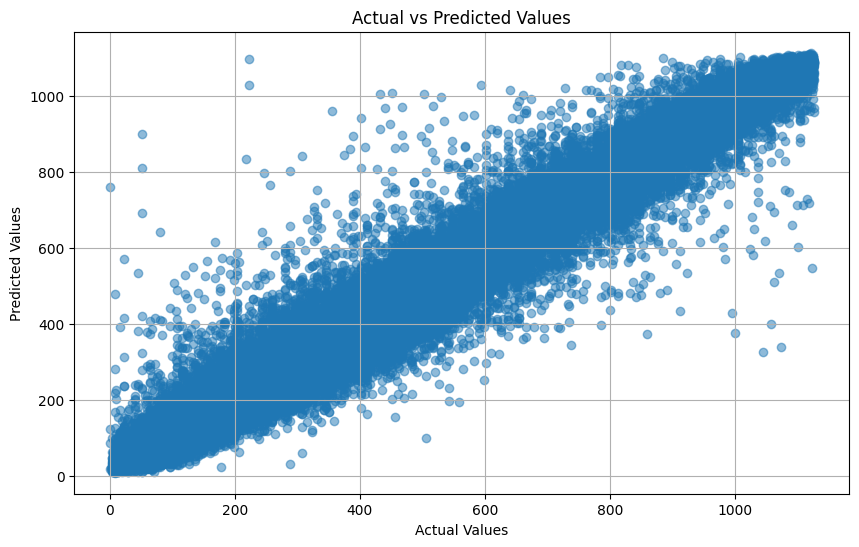

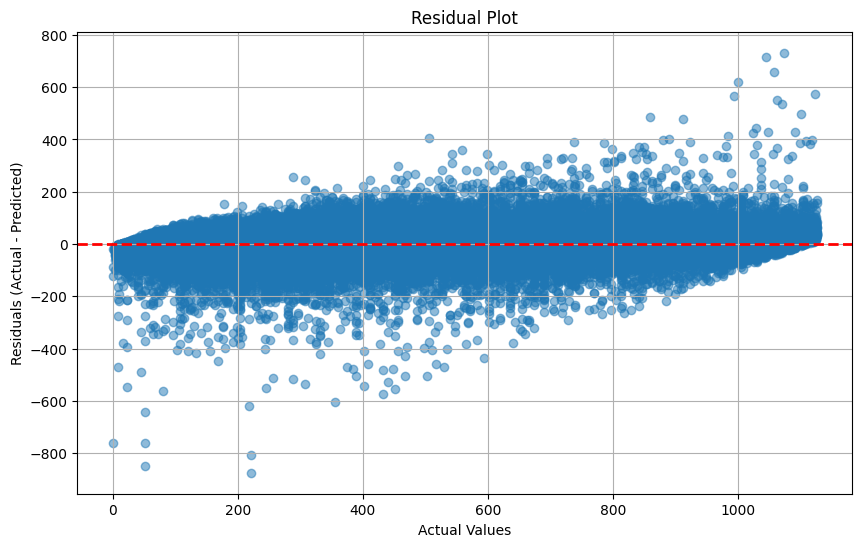

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))

plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()
